In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# Data exploration

In [255]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [257]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


# Data cleaning

In [258]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

the ratings column has the maximum missing values

In [259]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

1. It appears that there are a few duplicated values since the total rows are over 10,000 and we only have 9660 app names

In [260]:
df.duplicated().sum()

483

In [261]:
df.drop_duplicates(inplace=True)

In [262]:
df.shape

(10358, 13)

We removed 483 duplicated rows. Now we have 10358 rows and 13 columns

In [263]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [264]:
df[df["Reviews"] == '3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


It seems like there is misplaced values in row 10472. Let's drop this row for simplification 

In [265]:
df.drop(10472, inplace=True)

In [266]:
df1 = df.copy()

In [267]:
df1["Reviews"] = df["Reviews"].astype(int)

In [268]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [269]:
def convert(x):
    if "." in x:
        temp = x.replace(".", "")
        return temp[:-1]
    else:
        return x

In [270]:
df1["Size"] = df["Size"].str.replace("M", "000")

In [271]:
df1["Size"] = df1["Size"].apply(convert)

In [272]:
df1["Size"] = df1["Size"].str.replace("K", "")
df1["Size"] = df1["Size"].str.replace("k", "")

In [273]:
df1["Size"] = df1["Size"].replace("Varies with device", np.nan)

There are a lot of rows with which don't have size specified, i.e Varies with device. All those rows have been turned to nan

In [274]:
df1["Size"].isnull().sum()

1526

In [275]:
df1["Size"] = df1["Size"].astype(float)

In [276]:
df1["Installs"] = df["Installs"].str.replace("+", '').str.replace(",","")
df1["Installs"] = df1["Installs"].astype(int)


In [277]:
df1["Price"] = df1["Price"].str.replace("$" , "").astype(float)

In [278]:
df1["Last Updated"] = pd.to_datetime(df1["Last Updated"])
df1["day"] = df1["Last Updated"].dt.day
df1["month"] = df1["Last Updated"].dt.month
df1["year"] = df1["Last Updated"].dt.year
# df1.drop("Last Updated", axis=1, inplace=True)

In [279]:
df1.loc[:, df1.dtypes == "object"].nunique()

App               9659
Category            33
Type                 2
Content Rating       6
Genres             119
Current Ver       2831
Android Ver         33
dtype: int64

# Data visualizations

In [280]:
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'day', 'month', 'year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [281]:
for col in df1.columns:
    print(df1[col].value_counts(normalize=True))

ROBLOX                                           0.000869
8 Ball Pool                                      0.000676
Bubble Shooter                                   0.000579
Helix Jump                                       0.000579
Zombie Catchers                                  0.000579
                                                   ...   
Popsicle Launcher for Android P 9.0 launcher     0.000097
PixelLab - Text on pictures                      0.000097
P Launcher for Android™ 9.0                      0.000097
Pacify (Android P theme) - Theme for Xperia™     0.000097
iHoroscope - 2018 Daily Horoscope & Astrology    0.000097
Name: App, Length: 9659, dtype: float64
FAMILY                 0.187603
GAME                   0.108236
TOOLS                  0.081394
BUSINESS               0.041228
MEDICAL                0.039394
PRODUCTIVITY           0.039297
PERSONALIZATION        0.037463
LIFESTYLE              0.036014
COMMUNICATION          0.035338
FINANCE                0.034759
SP

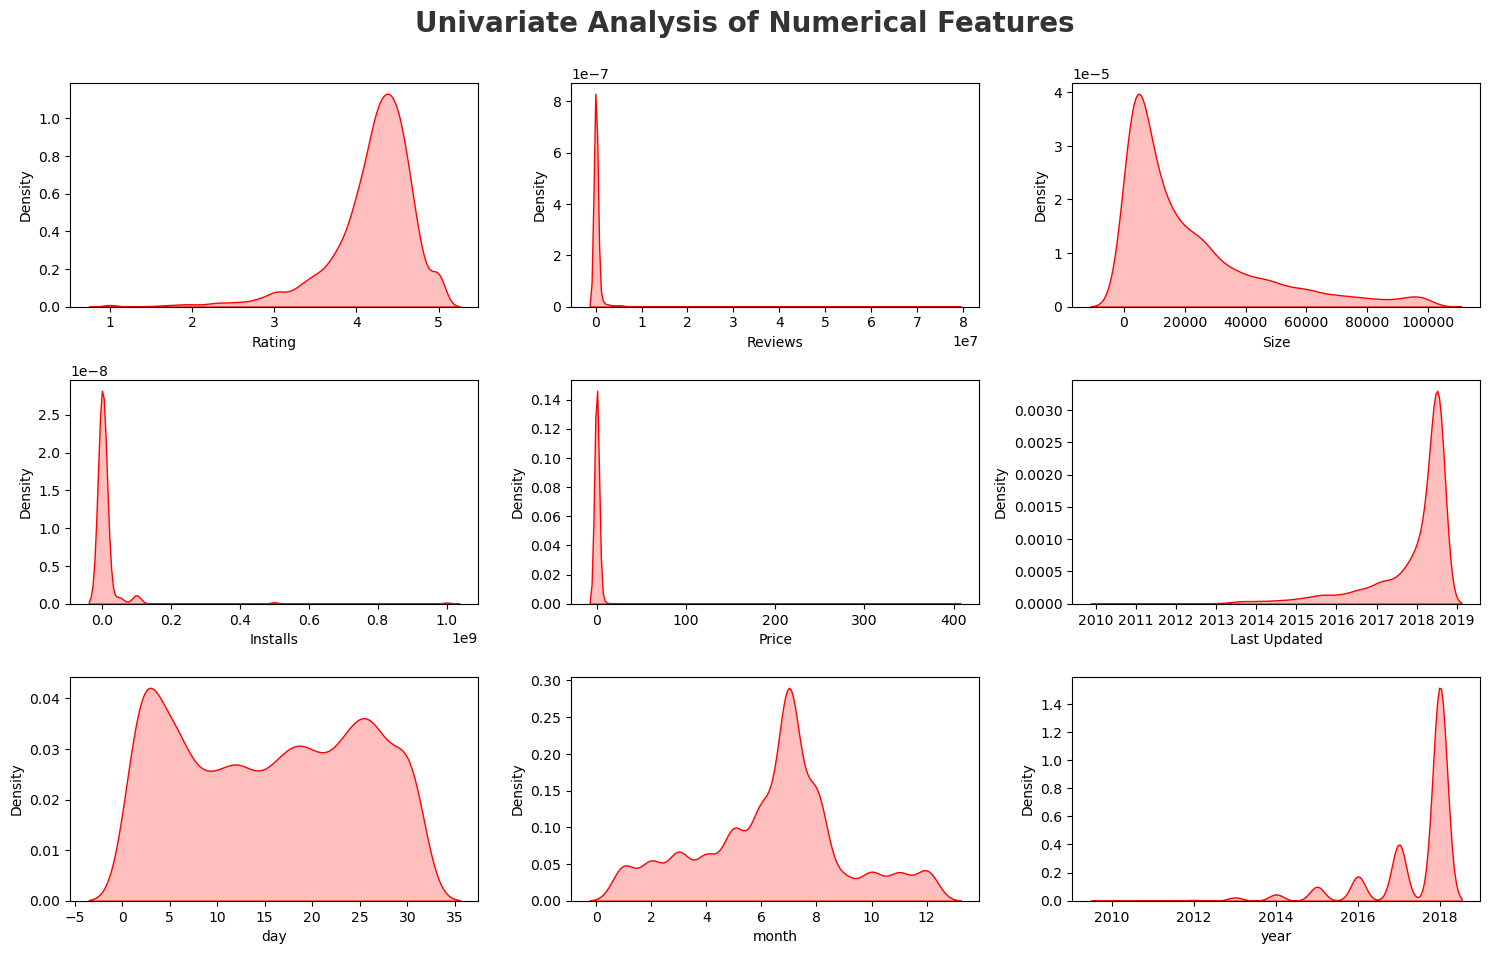

In [282]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df1[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

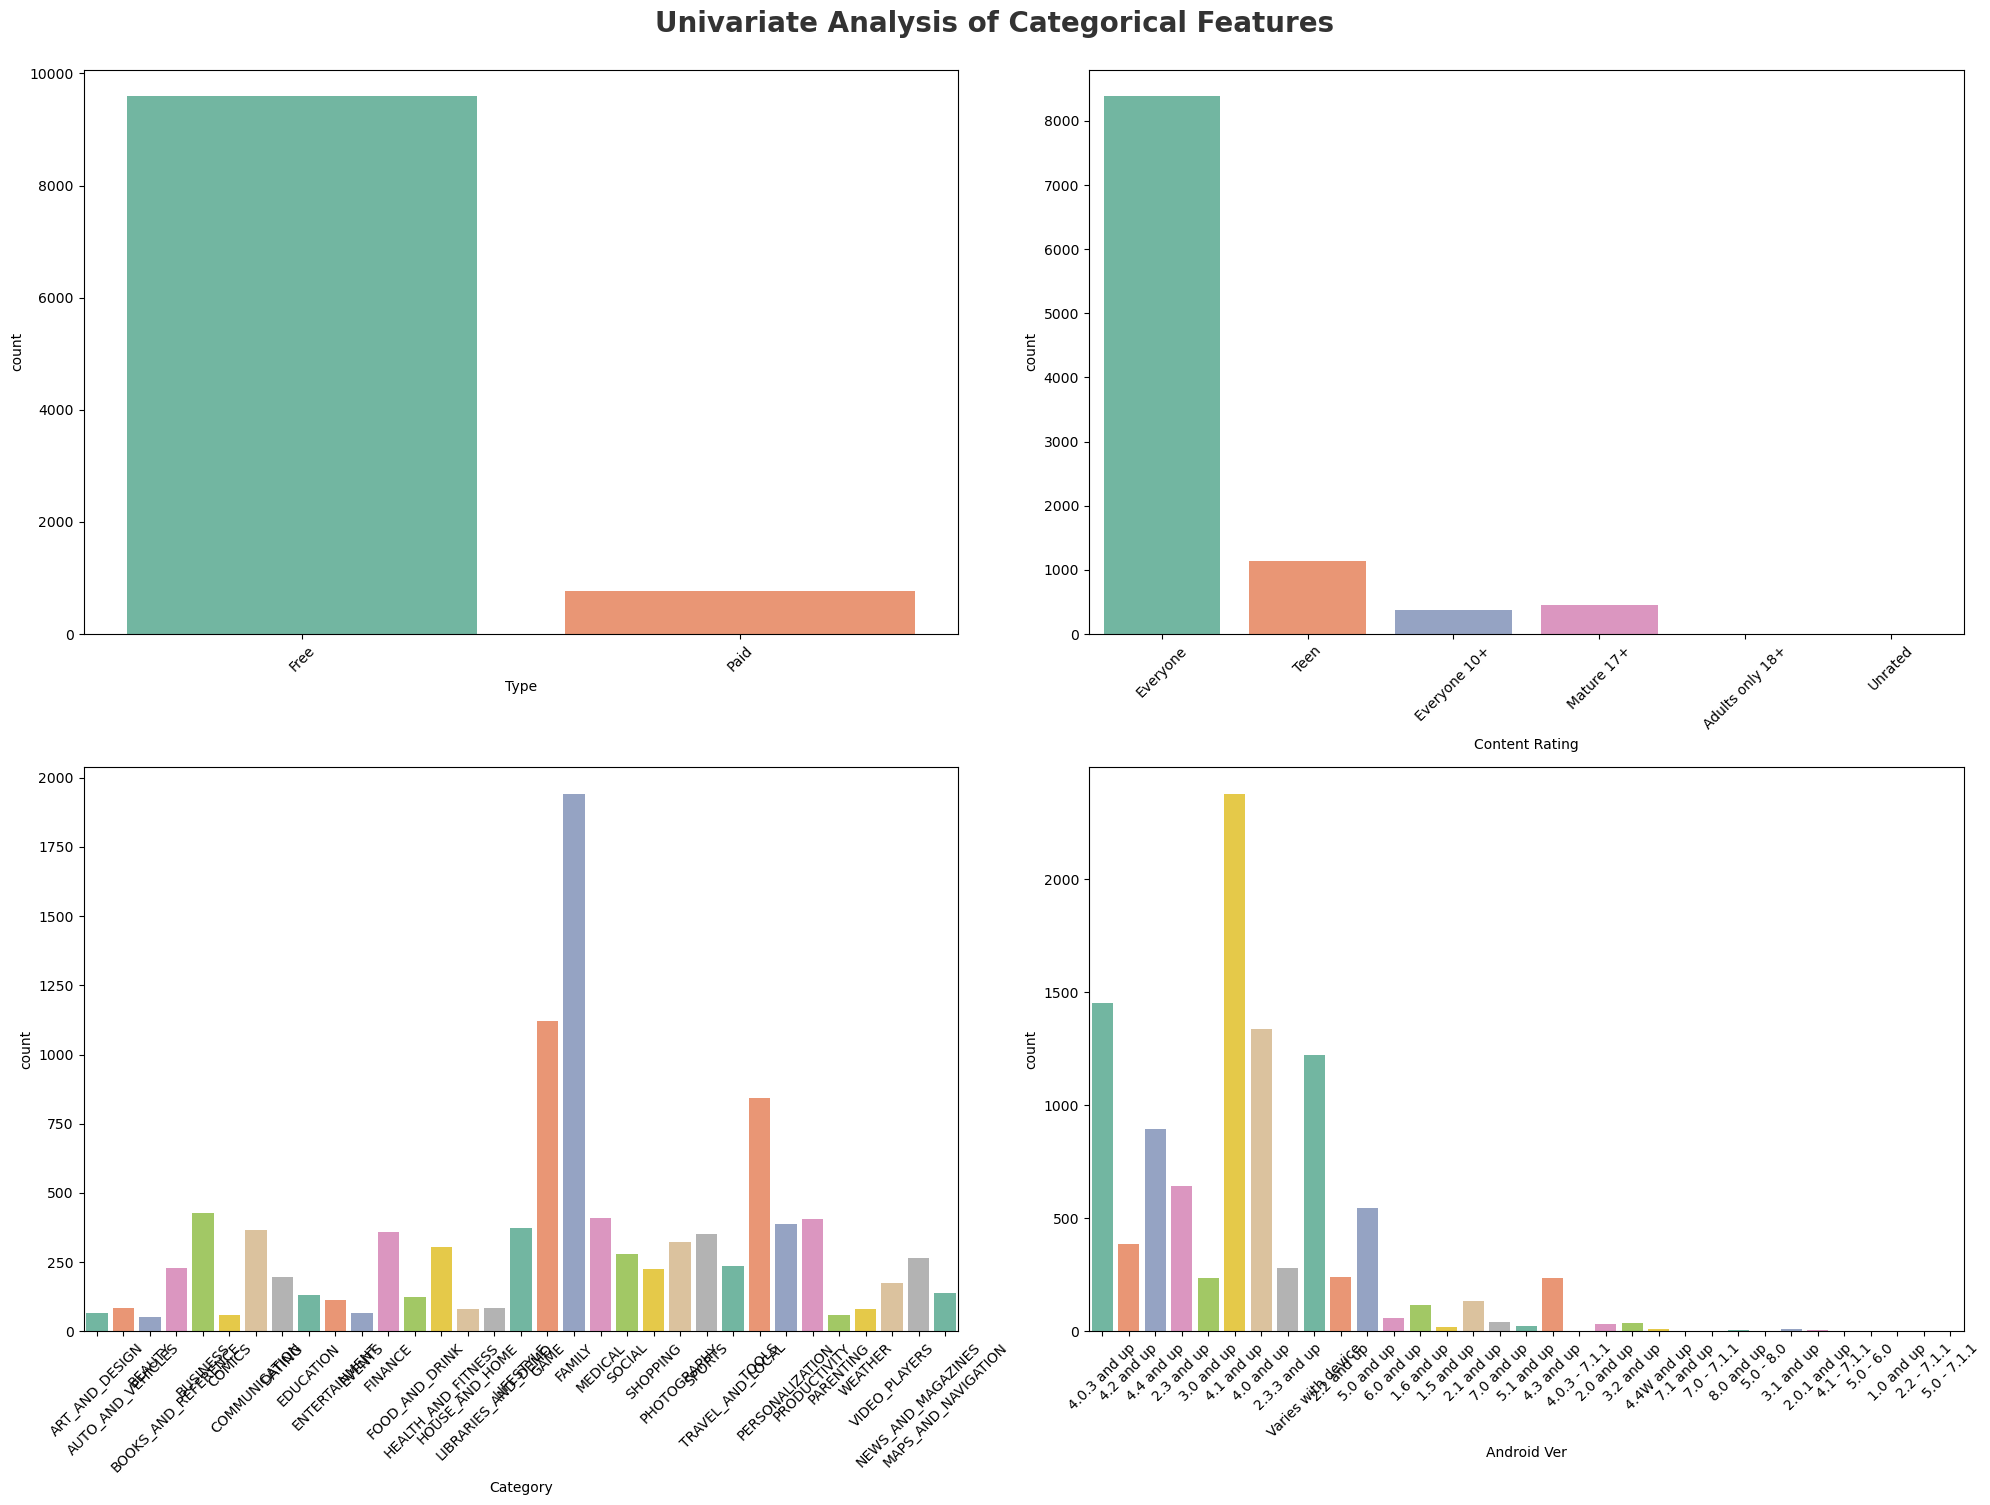

In [283]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating',"Category","Android Ver"]
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

1. Which is the most popular app category?
From the category countplot we can observe that family is the most popular category followed by gaming

2. Top ten categories are : 

In [284]:
df1["Category"].value_counts()[:11]

FAMILY             1943
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
SPORTS              351
Name: Category, dtype: int64

In [285]:
## Top 10 App Categories
category = pd.DataFrame(df1['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [302]:
category

,Count
FAMILY,1943
GAME,1121
TOOLS,843
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,388
LIFESTYLE,373
COMMUNICATION,366
FINANCE,360


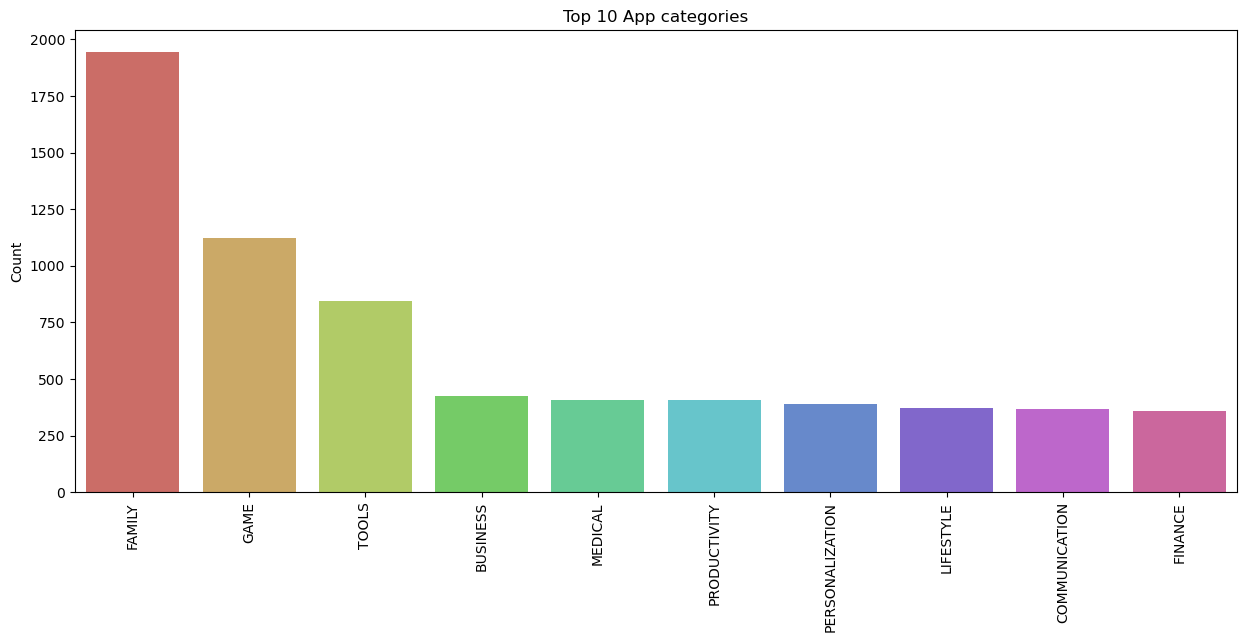

In [286]:
## top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

## Which is the most popular app category?

<AxesSubplot:ylabel='Category'>

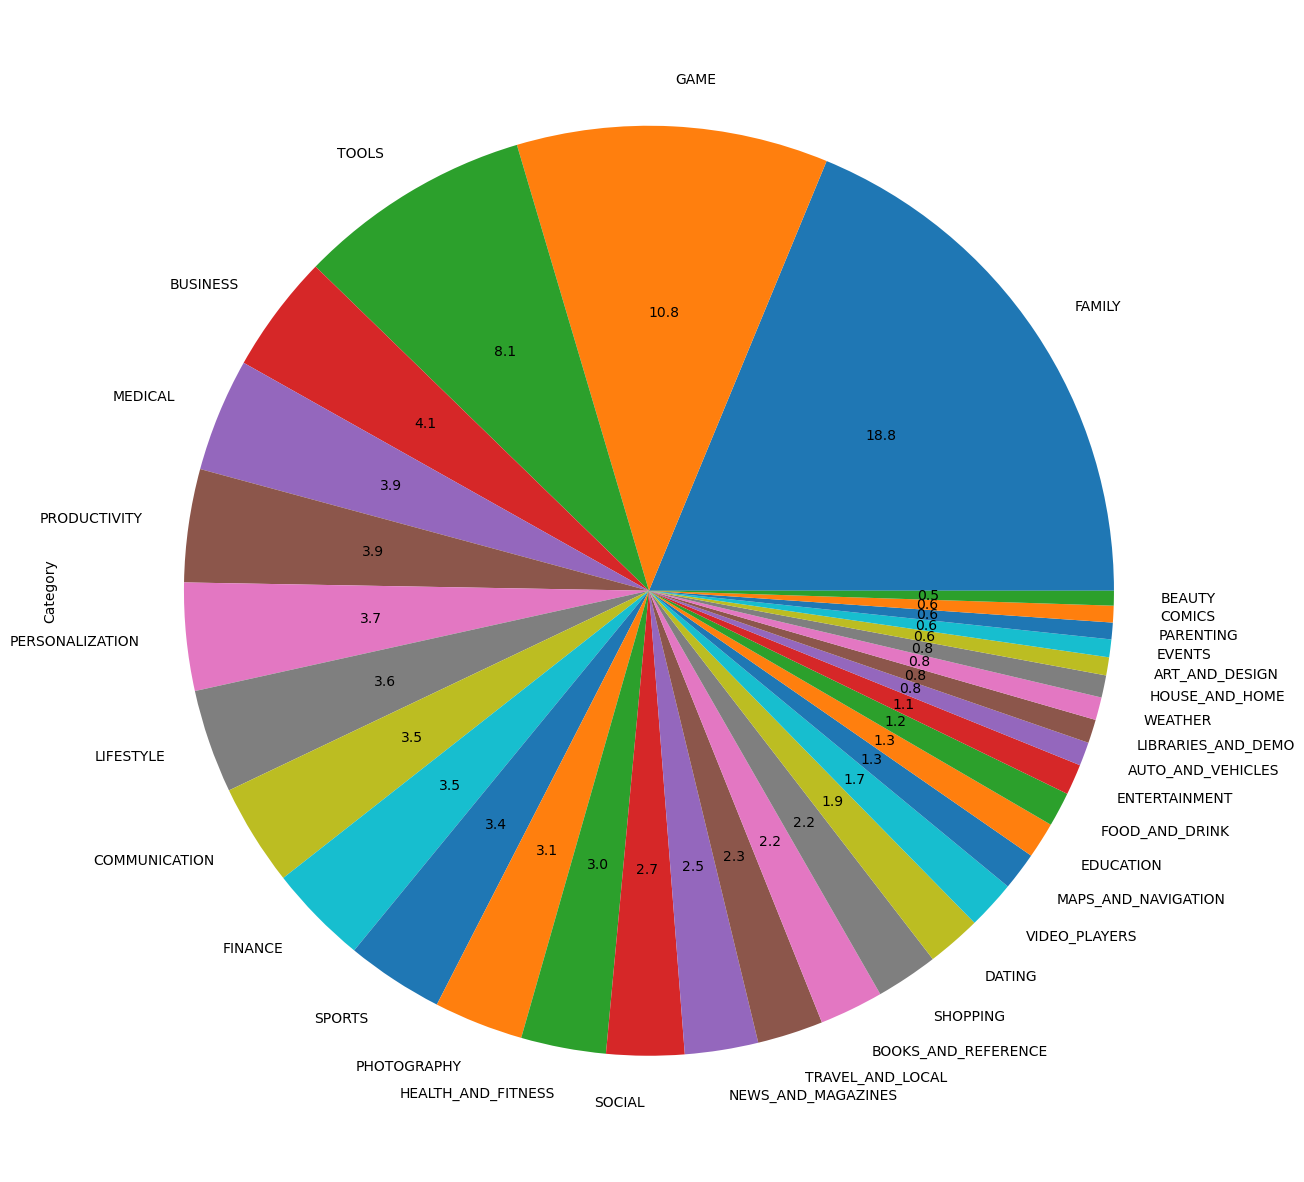

In [287]:
df1['Category'].value_counts().plot.pie(y=df1['Category'],figsize=(15,16),autopct='%1.1f')

# 1. Which Category has largest number of installations??

In [303]:
max_installs = dict()
for cat in category.index[:20]:
    tot_installs = df1[df1["Category"] == cat].Installs.sum()
    max_installs[cat] = tot_installs
val = max_installs.values()
keys = max_installs.keys()

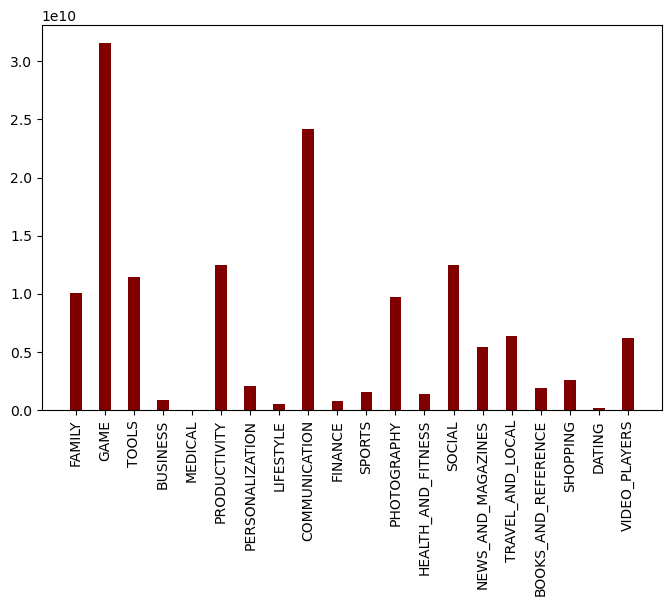

In [304]:
fig = plt.figure(figsize = (8, 5))
plt.bar(keys, val, color ='maroon',width = 0.4)
plt.xticks(rotation=90)
plt.show()

from the above graph we can observe that the most installs happen in gaming category (over 3 million installs) followed by communication category (close to 25 million installs)

# 2. What are the Top 5 most installed Apps in Each popular Categories ??

In [367]:
asc_installs = df1["Installs"].value_counts().index.sort_values(ascending=False)
asc_installs

Int64Index([1000000000,  500000000,  100000000,   50000000,   10000000,
               5000000,    1000000,     500000,     100000,      50000,
                 10000,       5000,       1000,        500,        100,
                    50,         10,          5,          1,          0],
           dtype='int64')

In [371]:
def top_five(category):
    cat_df = df1[df1["Category"] == category]
    # cat_df = category
    top_5 = []
    while(len(top_5) <= 5):
        for inst in asc_installs:
            for x in (cat_df[cat_df["Installs"] == inst]["App"].values):
                if len(top_5) > 5:
                    break
                if x not in top_5:
                    top_5.append(x)
    return top_5

In [372]:
dict_top5 = dict()
for cat in category.index[:10]:
    dict_top5[cat] = top_five(cat)
dict_top5

{'FAMILY': ['Google Play Games',
  'Pou',
  'My Talking Tom',
  'Candy Crush Saga',
  'ROBLOX',
  'Minion Rush: Despicable Me Official Game'],
 'GAME': ['Subway Surfers',
  'Candy Crush Saga',
  'Temple Run 2',
  'Pou',
  'My Talking Tom',
  'ROBLOX'],
 'TOOLS': ['Google',
  'Google Translate',
  'SHAREit - Transfer & Share',
  'Gboard - the Google Keyboard',
  'Clean Master- Space Cleaner & Antivirus',
  'Security Master - Antivirus, VPN, AppLock, Booster'],
 'BUSINESS': ['OfficeSuite : Free Office + PDF Editor',
  'File Commander - File Manager/Explorer',
  'Indeed Job Search',
  'Docs To Go™ Free Office Suite',
  'Facebook Pages Manager',
  'Secure Folder'],
 'MEDICAL': ['Blood Pressure',
  'My Calendar - Period Tracker',
  'GoodRx Drug Prices and Coupons',
  'MyChart',
  'FollowMyHealth®',
  'CareZone'],
 'PRODUCTIVITY': ['Google Drive',
  'Microsoft Word',
  'Dropbox',
  'Google Calendar',
  'Cloud Print',
  'Adobe Acrobat Reader'],
 'PERSONALIZATION': ['ZEDGE™ Ringtones & Wallpap

In [375]:
for x,i in dict_top5.items():
    print(x)
    print(i)

FAMILY
['Google Play Games', 'Pou', 'My Talking Tom', 'Candy Crush Saga', 'ROBLOX', 'Minion Rush: Despicable Me Official Game']
GAME
['Subway Surfers', 'Candy Crush Saga', 'Temple Run 2', 'Pou', 'My Talking Tom', 'ROBLOX']
TOOLS
['Google', 'Google Translate', 'SHAREit - Transfer & Share', 'Gboard - the Google Keyboard', 'Clean Master- Space Cleaner & Antivirus', 'Security Master - Antivirus, VPN, AppLock, Booster']
BUSINESS
['OfficeSuite : Free Office + PDF Editor', 'File Commander - File Manager/Explorer', 'Indeed Job Search', 'Docs To Go™ Free Office Suite', 'Facebook Pages Manager', 'Secure Folder']
MEDICAL
['Blood Pressure', 'My Calendar - Period Tracker', 'GoodRx Drug Prices and Coupons', 'MyChart', 'FollowMyHealth®', 'CareZone']
PRODUCTIVITY
['Google Drive', 'Microsoft Word', 'Dropbox', 'Google Calendar', 'Cloud Print', 'Adobe Acrobat Reader']
PERSONALIZATION
['ZEDGE™ Ringtones & Wallpapers', 'CM Launcher 3D - Theme, Wallpapers, Efficient', 'APUS Launcher - Theme, Wallpaper, Hide

In [376]:
df1[df1["App"] == 'Google Play Games']["Installs"]

865     1000000000
5856    1000000000
Name: Installs, dtype: int32

In [ ]:
x = dict_top5["FAMILY"]
y = []
for name in x:
    y.append(df1[df1["App"] == name]["Installs"].iloc[0])
fig = plt.figure(figsize = (8, 5))
plt.title("FAMILY")
plt.bar(x, y, color ='blue',width = 0.4)
plt.xticks(rotation=90)
plt.show()


<Figure size 800x500 with 0 Axes>

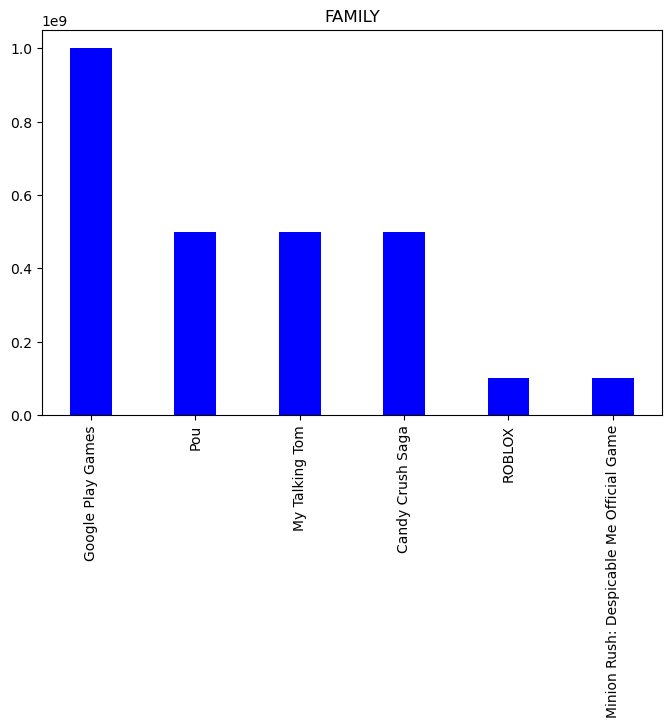

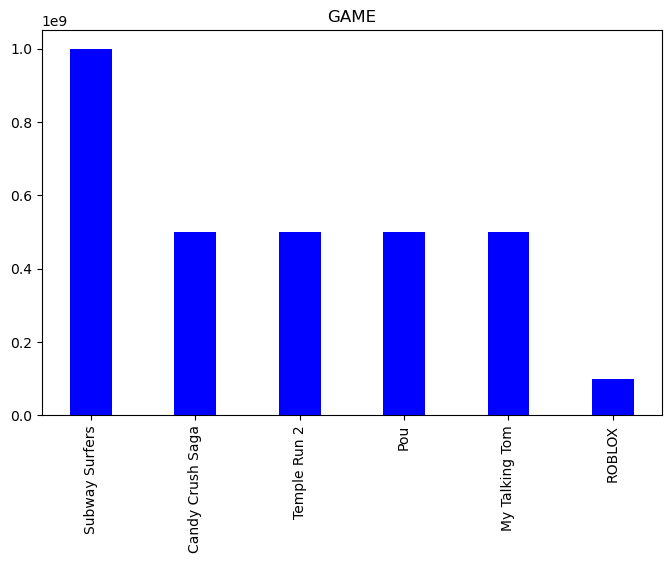

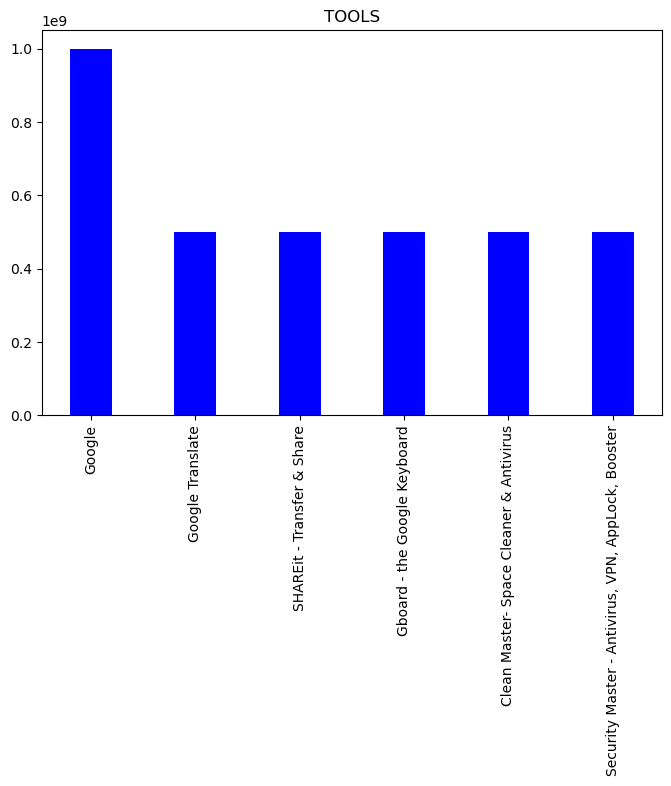

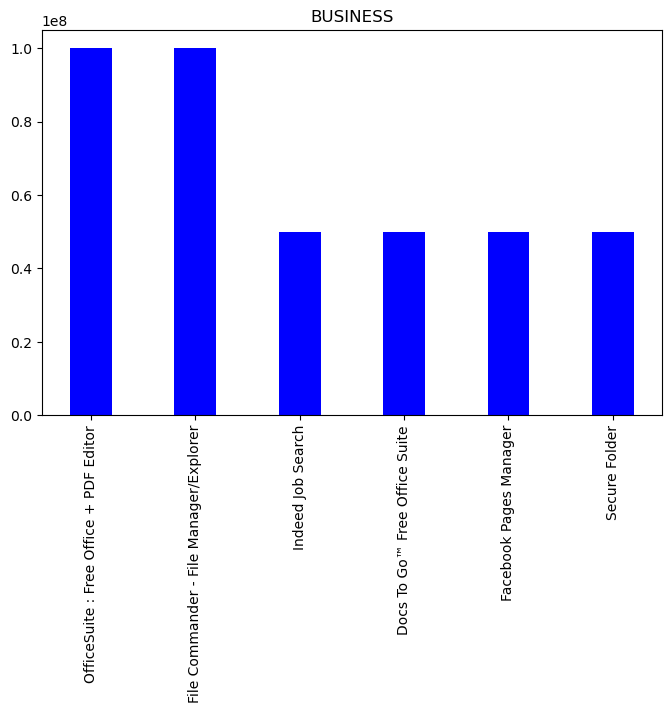

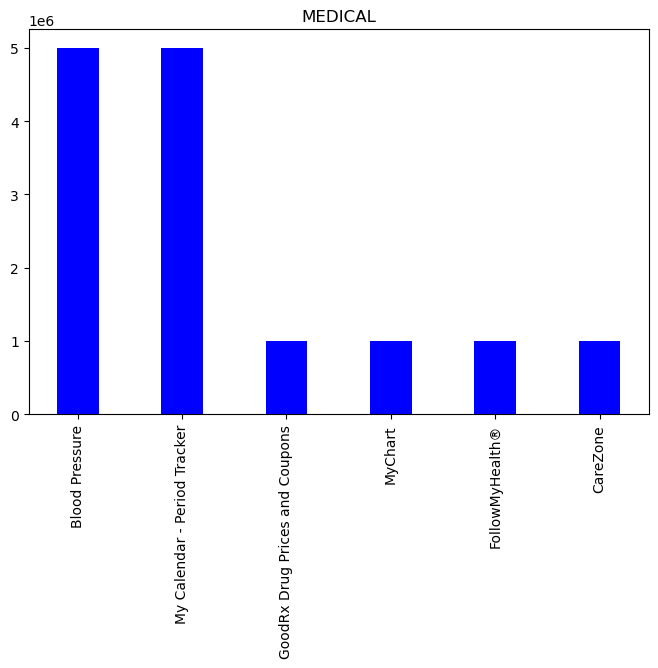

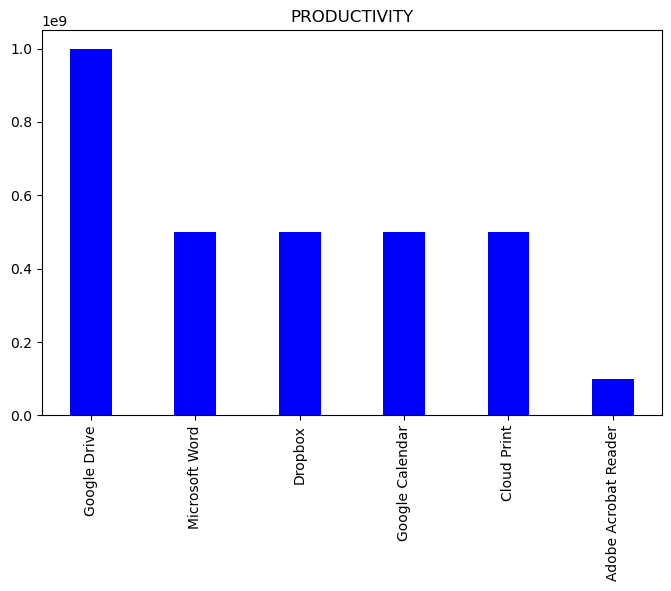

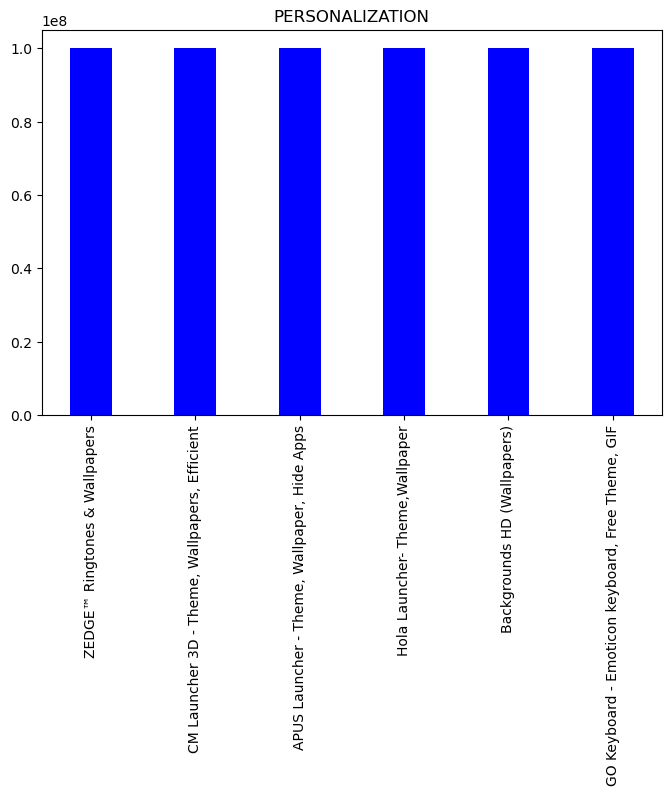

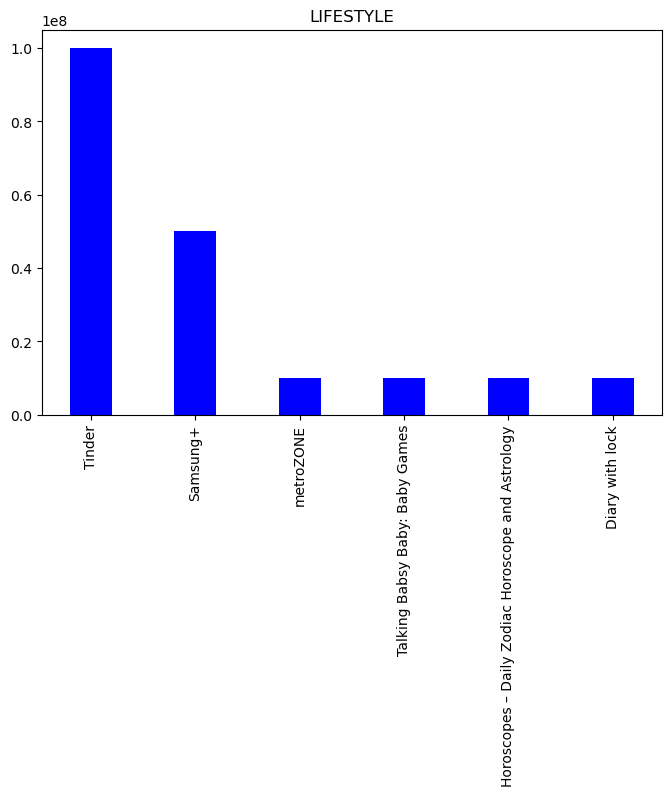

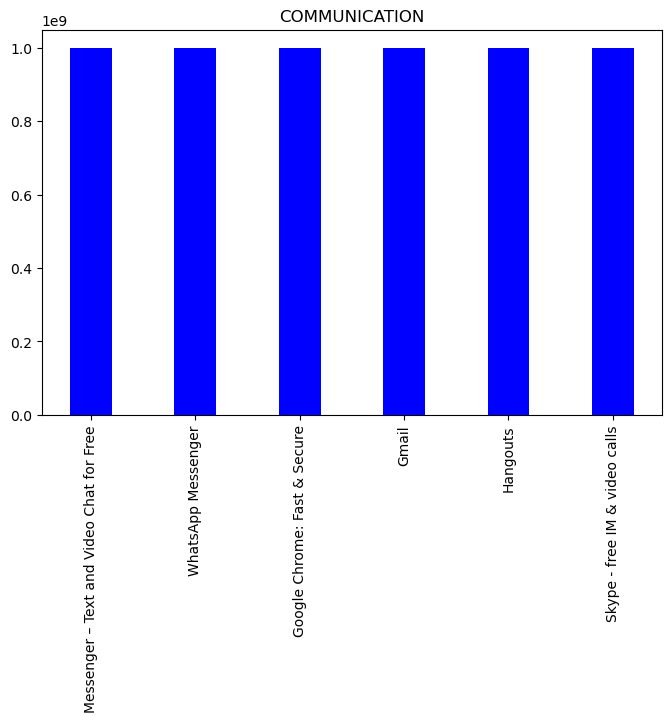

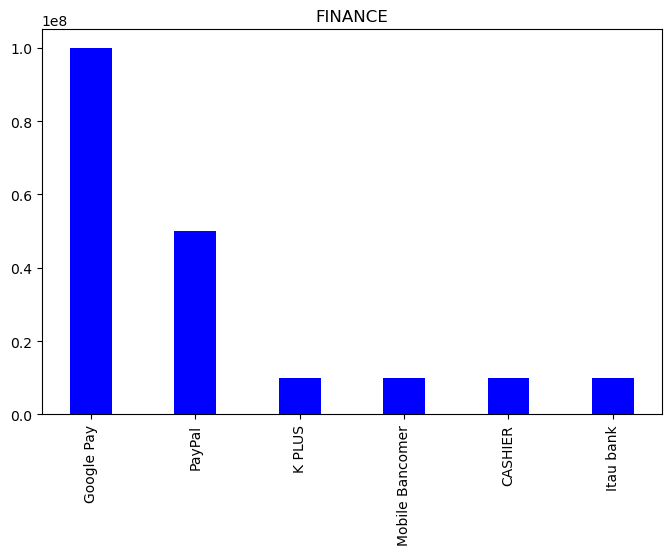

In [391]:
fig = plt.figure(figsize = (8, 5))
for cat, lst in dict_top5.items():
    x = dict_top5[cat]
    y = []
    for name in lst:
        y.append(df1[df1["App"] == name]["Installs"].iloc[0])
    fig = plt.figure(figsize = (8, 5))
    plt.title(cat)
    plt.bar(x, y, color ='blue',width = 0.4)
    plt.xticks(rotation=90)
    plt.show()

# 3. How many apps are there on Google Play Store which get 5 ratings??

In [395]:
df1[df1["Rating"] == 5].shape[0]

271

There are 271 apps with the rating of 5 on play store